# Linear Regression



## Index

 1. Importing Libraries, Data Cleaning & Pre-processing
 2. Target Variable = Magnitude
 3. Data Visualisation
   - 3.1 Continious Variables
   - 3.2 Categorical variables
 4. Linear Regression
   - 4.1 Simple Linear Regression
   - 4.2 Multiple Regression Model
 5. Interaction
 6. Regularization 
   - 6.1 Ridge Regression
    




## 1. Importing Libraries, Data Cleaning & Pre-processing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# to split train and test dataset
from sklearn.model_selection import train_test_split 
# to implement linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# to ignore warning msg
import warnings 
warnings.filterwarnings('ignore')

#### Importing the dataset by reading it from a CSV file.

In [2]:
df = pd.read_csv('earthquake_data.csv')

#### we will summarize the dataset's. Output varies depending on numeric data or categorical data type. In case of numeric data:- count, mean, std, min, max, 75th, 50th ,25th percentiles is displayed In case of categorical data:- count, unique, top, freq, first and last items

In [3]:
df.describe(include='all')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
count,5479,5479.000000,5479.000000,5479.000000,5479.000000,5479,4875.000000,5028.000000,5027.000000,5479.000000,...,5479,5479,5479,4981.000000,5479.000000,5013.000000,5024.000000,5479,5479,5479
unique,5477,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,...,5479,1171,4,NaN,NaN,NaN,NaN,2,13,14
top,2018-07-19T17:19:00.210Z,NaN,NaN,NaN,NaN,ml,NaN,NaN,NaN,NaN,...,2018-07-20T19:51:44.080Z,"4km WSW of Volcano, Hawaii",earthquake,NaN,NaN,NaN,NaN,automatic,hv,hv
freq,2,NaN,NaN,NaN,NaN,4860,NaN,NaN,NaN,NaN,...,1,688,5439,NaN,NaN,NaN,NaN,4614,4380,4380
mean,NaN,24.145829,-147.086426,6.558106,2.312119,NaN,20.886154,89.912665,0.108372,0.235240,...,NaN,NaN,NaN,0.645904,0.893382,0.684618,16.473527,NaN,NaN,NaN
std,NaN,13.046497,33.293635,24.190602,0.638113,NaN,11.010084,59.753048,0.883814,0.168817,...,NaN,NaN,NaN,1.533695,2.973400,0.903529,20.811816,NaN,NaN,NaN
min,NaN,-61.394800,-179.702900,-3.390000,0.950000,NaN,2.000000,11.000000,0.000140,0.010000,...,NaN,NaN,NaN,0.100000,0.000000,0.000000,1.000000,NaN,NaN,NaN
25%,NaN,19.401167,-155.281006,0.350000,1.940000,NaN,13.000000,47.750000,0.004684,0.140000,...,NaN,NaN,NaN,0.220000,0.200000,0.240000,9.000000,NaN,NaN,NaN
50%,NaN,19.412500,-155.271668,0.870000,2.300000,NaN,19.000000,69.000000,0.007603,0.190000,...,NaN,NaN,NaN,0.280000,0.280000,0.330000,13.000000,NaN,NaN,NaN
75%,NaN,19.427000,-155.258667,1.820000,2.650000,NaN,26.000000,114.000000,0.011615,0.270000,...,NaN,NaN,NaN,0.440000,0.480000,0.440000,19.000000,NaN,NaN,NaN


#### lets inspect first 5 rows of dataset

In [4]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-07-22T20:39:06.910Z,19.390833,-155.264328,-0.71,2.37,md,16.0,103.0,0.007544,0.34,...,2018-07-22T20:42:14.430Z,"5km SSW of Volcano, Hawaii",earthquake,0.34,0.38,0.39,7.0,automatic,hv,hv
1,2018-07-22T20:38:56.460Z,19.424166,-155.255005,0.37,2.43,ml,13.0,146.0,0.005713,0.10,...,2018-07-22T20:44:36.870Z,"1km WSW of Volcano, Hawaii",earthquake,0.22,0.15,0.42,19.0,automatic,hv,hv
2,2018-07-22T20:38:48.240Z,19.398666,-155.290161,0.79,2.40,ml,11.0,76.0,0.012210,0.17,...,2018-07-22T20:44:27.480Z,"6km WSW of Volcano, Hawaii",earthquake,0.51,0.43,0.42,22.0,automatic,hv,hv
3,2018-07-22T20:37:56.800Z,46.848167,-121.755837,0.49,1.33,md,8.0,93.0,0.020080,0.03,...,2018-07-22T20:39:55.900Z,"27km NNW of Packwood, Washington",earthquake,0.39,1.05,0.15,5.0,automatic,uw,uw
4,2018-07-22T20:37:14.450Z,19.411501,-155.274002,1.05,2.13,ml,31.0,40.0,0.011330,0.27,...,2018-07-22T20:42:55.000Z,"4km WSW of Volcano, Hawaii",earthquake,0.26,0.20,0.33,15.0,automatic,hv,hv


#### Now we will inspect the datatype of all 22 Columns

In [5]:
df.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

#### We can see that data is consistent

#### Lets check for null values

In [6]:
df.isnull().sum().sum()

2926

#### From the above result we can observe that we have 2926 null value. And we have to handle these values to get accurate results

Missing values need to be handled because,
1. They reduce the quality for any of our performance metric 
2. It can also lead to wrong prediction or classification
3. They cause a high bias for any given model being used

There are three popular methods to handle missing data:
1. Drop missing values
2. Fill missing values with test statistic
3. Predict missing values with a machine algorithms

#### Now lets find total number of missing values in each columns. Also I will caluclate the percentage of missing values in each columns.

In [7]:
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
nst,604,11.02
horizontalError,498,9.09
magError,466,8.51
magNst,455,8.30
dmin,452,8.25
gap,451,8.23


#### From the above results we can infer that only columns with numeric values , data is missing. In this scenario, we can replace the null values with mean of respective columns. In another where we have missing categorical values, we have to replace with mode of the column.

#### lets fill mean in place of NaN

In [8]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum().sum()

0

#### We can observe from above result there are no more null values. Hence null values are handled successfully!

#### Lets remove unwanted columns from dataFrame which we know will not impact the magnitude.


In [9]:
df= df.drop(['id','updated','place','net','time','magSource','locationSource'], axis =1)
df.head()

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,type,horizontalError,depthError,magError,magNst,status
0,19.390833,-155.264328,-0.71,2.37,md,16.0,103.0,0.007544,0.34,earthquake,0.34,0.38,0.39,7.0,automatic
1,19.424166,-155.255005,0.37,2.43,ml,13.0,146.0,0.005713,0.10,earthquake,0.22,0.15,0.42,19.0,automatic
2,19.398666,-155.290161,0.79,2.40,ml,11.0,76.0,0.012210,0.17,earthquake,0.51,0.43,0.42,22.0,automatic
3,46.848167,-121.755837,0.49,1.33,md,8.0,93.0,0.020080,0.03,earthquake,0.39,1.05,0.15,5.0,automatic
4,19.411501,-155.274002,1.05,2.13,ml,31.0,40.0,0.011330,0.27,earthquake,0.26,0.20,0.33,15.0,automatic


## 2. Target Variable = Mag

#### Now lets study more about our target variable ,magnitude
Lets stary by plotting box plot

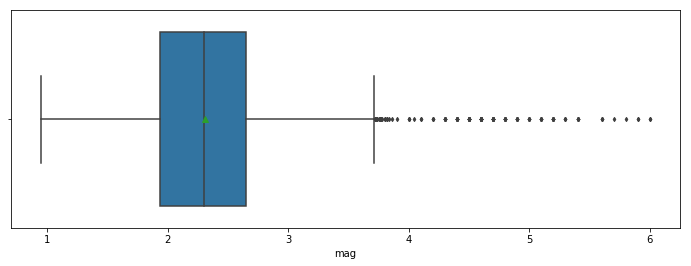

In [10]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'mag', data = df, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

There are lot of outliers above 3.7.
The range of value are between 1.8 to 2.6 as defined by interquartile range.
The distribution is even.

## 3. Data Visualisation 

### 3.1 Continious Variables

#### Let us visualise univariate pattern between some important feature and our target variable to check a strong linear pattern exists.

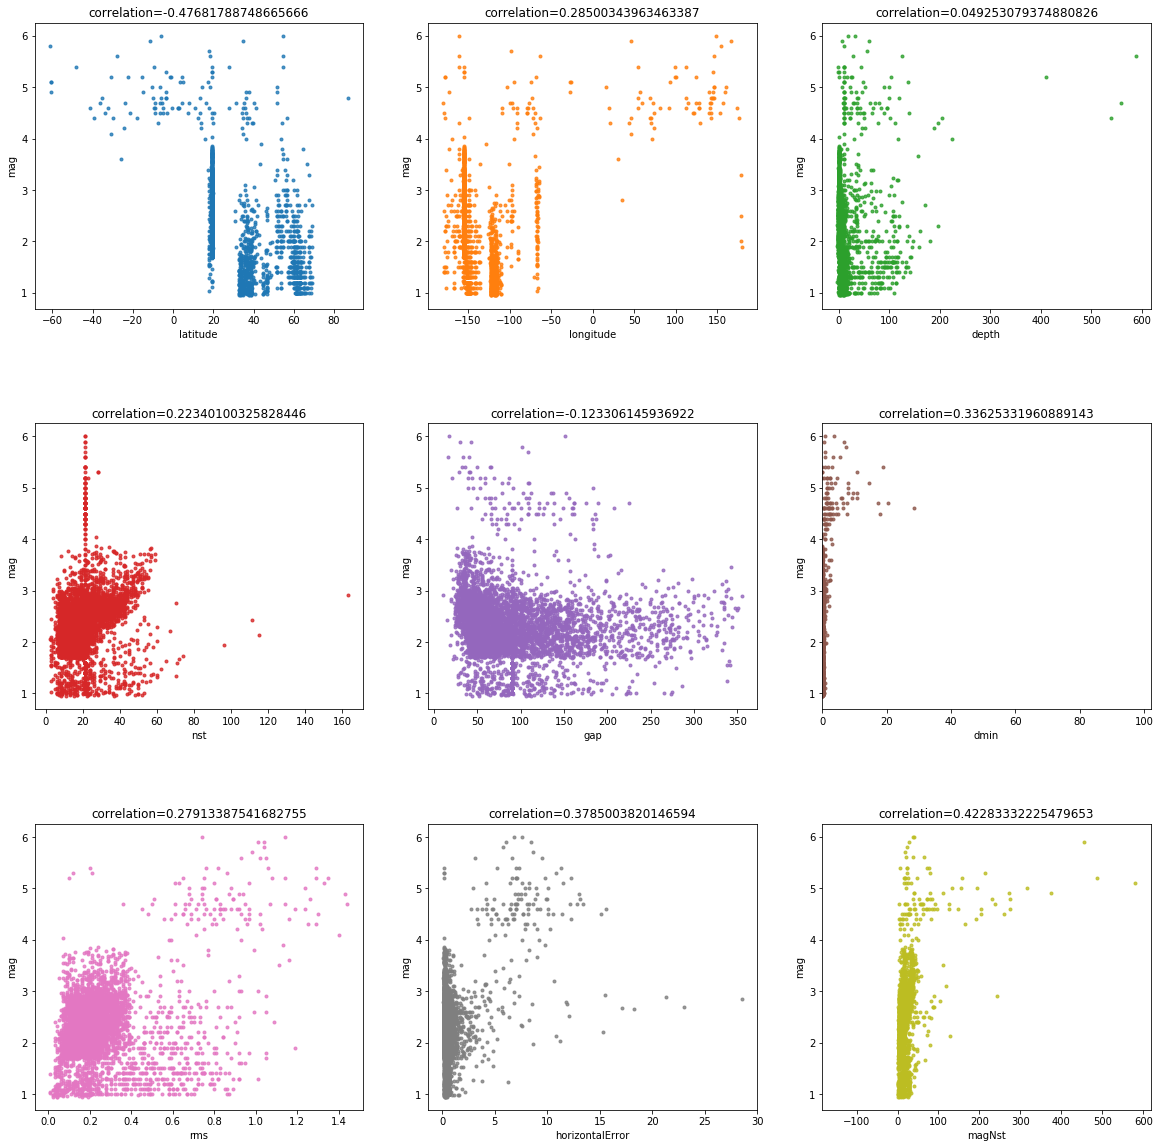

In [11]:
df_1= df[['latitude','longitude','depth','mag','nst','gap','dmin','rms','horizontalError','magNst']]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr = pd.Series()
for col in df_1.columns.values[:]:
    if ((col!='mag')):
        corr[col] = df_1['mag'].corr(df_1[col])


for i in range(3):
    for j in range(3):
        sns.regplot(x=corr.index.values[i*3+j], y='mag', data=df_1,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

From the regplots, we seem to get the linear distribution of the data points, for example with mag against rms and gap . Thus in the latter analysis, we will implement some linear models

#### Let us visualise correlation amongst variables

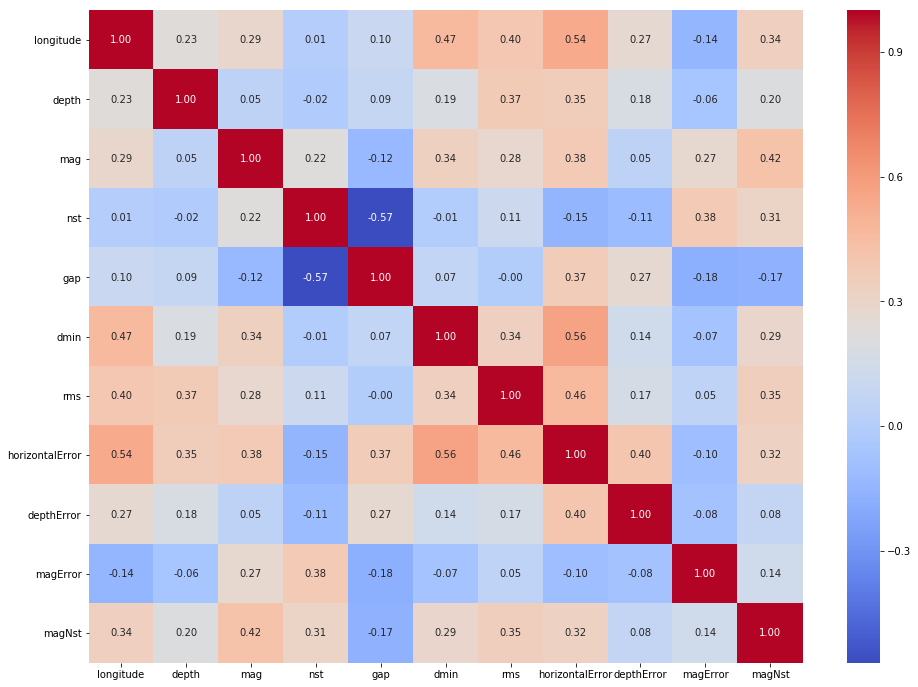

In [12]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

From the above matrix, we see that there is corrlation bewtween 'mag' and 'magNst','horizontalError','dmin'.

### 3.2 Categorical variables

Now we will inspect distribution of categorical values with target.

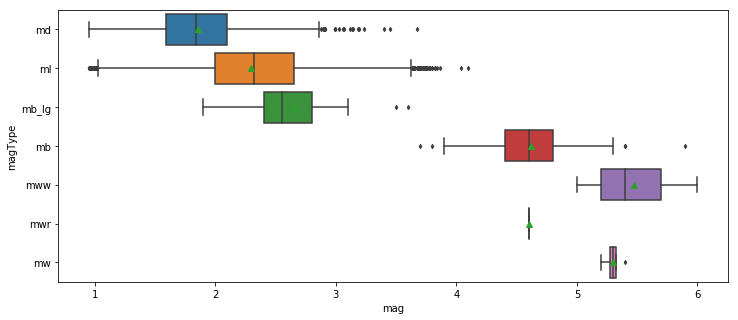

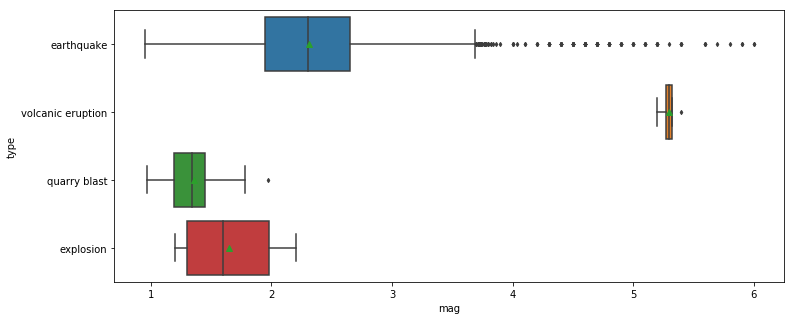

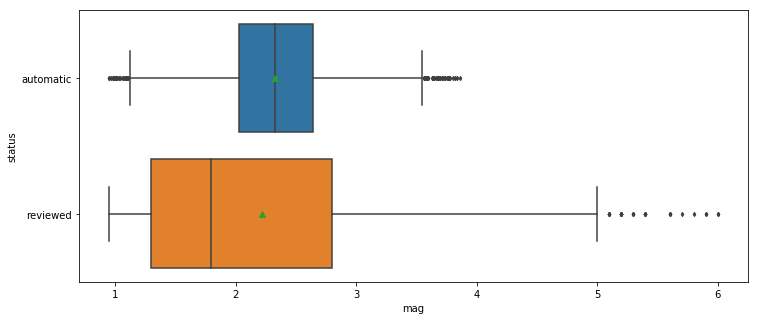

In [13]:
plt.figure(figsize=(12,5))
sns.boxplot(y='magType', x='mag', data=df, orient='h', showmeans=True, fliersize = 3)
plt.show()
plt.figure(figsize=(12,5))
sns.boxplot(y='type', x='mag', data=df, orient='h', showmeans=True, fliersize = 3)
plt.show()
plt.figure(figsize=(12,5))
sns.boxplot(y='status', x='mag', data=df, orient='h', showmeans=True, fliersize = 3)
plt.show()


All plots seem to be linearly related to magnitude.
As we can observe that there are may categories for magType

In [14]:
df['magType'].value_counts()

ml       4860
md        486
mb         91
mb_lg      20
mww        17
mw          4
mwr         1
Name: magType, dtype: int64

We can group the values in magType which are not many into one category called  'mt3'

In [15]:
df["magType"]= df["magType"].str.replace("mb", "mt3", case = False)
df["magType"]= df["magType"].str.replace("mt3_lg", "mt3", case = False)
df["magType"]= df["magType"].str.replace("mww", "mt3", case = False)
df["magType"]= df["magType"].str.replace("mw", "mt3", case = False)
df["magType"]= df["magType"].str.replace("mt3r", "mt3", case = False)


In [16]:
df['magType'].value_counts()

ml     4860
md      486
mt3     133
Name: magType, dtype: int64

We have grouped somevales for the ease of understanding.

All the following assumptions for linear model have met: 
1. Linear relationship
2. Multivariate normality
3. No or little multicollinearity
4. Homoscedasticity

## 4. Linear Regression

#### let us attempt to model the relationship between two or more variables by fitting a linear equation to observed data

### 4.1 Simple Linear Regression

#### lets model linear regression by taking only 1 independent variable which has highest correlation with magnitude.

In [17]:
#choosing X:independent variable and y:target/dependent variable
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
X = df['magNst']
y = df['mag']
# splitting training and testing data set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size =0.2, random_state = 0)
# fitting dataset to linear model
reg= linear_model.LinearRegression()
X_train = np.array(X, dtype=pd.Series).reshape(-1,1)
y_train = np.array(y, dtype=pd.Series)
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
#predicting target using modelX_train = np.array(X, dtype=pd.Series).reshape(-1,1)
X_test = np.array(X, dtype=pd.Series).reshape(-1,1)
y_test = np.array(y, dtype=pd.Series)
y_pred = reg.predict(X_test)

In [19]:
#Accuracy using K-fold
accuracy = cross_val_score(estimator = reg, X = X_test, y = y_test, cv = 5)
accuracy.mean()

0.16579185202210786

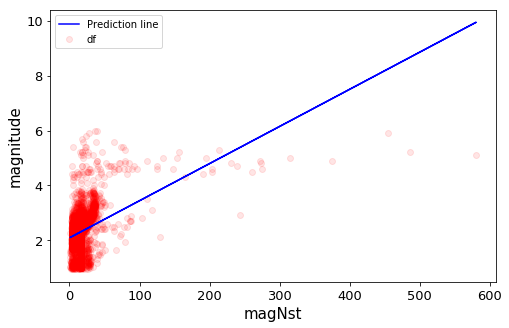

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(X_test,y_test,color='red',label="df", alpha=0.1)
plt.plot(X_test,y_pred,color="blue",label="Prediction line")
plt.xlabel("magNst", fontsize=15)
plt.ylabel("magnitude", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

#### We use cross validation technique to calulate accuracy. The accuracy is 16.5%, which is less. So, we will combine with other indepented variable to improve the model accuracy.

### 4.2 Multiple Regression Model

#### Here we will consider multiple independent to generate linear models.

#### We will implement Backward elimination (or backward deletion) process. All the independent variables are entered into the equation first and each one is deleted one at a time if they do not contribute to the regression equation. Stepwise selection is considered a variation of the previous two methods.

In [21]:
# all variables selected as input
X = df[['latitude','longitude','depth','magType','nst','gap','dmin','rms','type','horizontalError','depthError','magError','magNst','status']]

# target variable set
y = df['mag']

#### As we have already observed we have to consider categorical values in the equation.To account for the categorical values we will consider creating Dummy/Artificial variables

#### Encoding Dummy variables
  1. magType
  2. Type
  3. Status

In [22]:
# creating dummies and dropping first column to avoid dummy trap
X= pd.get_dummies(X,drop_first = True)


In [23]:
# inpecting if dummies are created successfully
X.head()


,latitude,longitude,depth,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,magType_ml,magType_mt3,type_explosion,type_quarry blast,type_volcanic eruption,status_reviewed
0,19.390833,-155.264328,-0.71,16.0,103.0,0.007544,0.34,0.34,0.38,0.39,7.0,0,0,0,0,0,0
1,19.424166,-155.255005,0.37,13.0,146.0,0.005713,0.10,0.22,0.15,0.42,19.0,1,0,0,0,0,0
2,19.398666,-155.290161,0.79,11.0,76.0,0.012210,0.17,0.51,0.43,0.42,22.0,1,0,0,0,0,0
3,46.848167,-121.755837,0.49,8.0,93.0,0.020080,0.03,0.39,1.05,0.15,5.0,0,0,0,0,0,0
4,19.411501,-155.274002,1.05,31.0,40.0,0.011330,0.27,0.26,0.20,0.33,15.0,1,0,0,0,0,0


In [24]:
#X = X[['latitude','longitude','depth','nst','gap','dmin','rms','horizontalError','depthError','magError','magType_md','type_explosion','type_quarry blast','status_reviewed']]
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
#reg = LinearRegression()
#reg.fit(X_train,y_train)
#y_pred = reg.predict(X_test)
#y_pred
#y_pred = reg.predict(X_test)
#plt.scatter(y_test, y_pred)

In [25]:
# To start backward emilination we will have to put all predictors as our imput
X= X[['latitude','longitude','depth','nst','gap','dmin','rms','horizontalError','depthError','magError','magNst','magType_ml','magType_mt3','type_explosion','type_quarry blast','status_reviewed']]
y = df['mag']
X_o = X

#### Since we are following backward selection we have to repeatedly use model selection. Hence we will create a function.

In [26]:
# function to carry out multiple regression
def reg_model(X,y):
    """ This function is used to generate linear model.Inputs X: independent values
    y: target value. 
    Outputs: It will generate model along with mean score and variance score
    """
    reg = linear_model.LinearRegression() # Create a linear regression object
    reg.fit(X,y)
    # Statistical data exploration
    #train[features] = sm.add_constant(train[features])
    
    result = sm.OLS(y, X).fit()
    print (result.summary())
    
    #Applying K-fold cross validation
    score = cross_val_score(estimator = reg , X = X, y = y, cv = 5)
    
    print('Mean Score =' + str(score.mean()))
    print('Variance Score =' + str(score.std()))

### Model 1

In [27]:
reg_model(X,y)

                            OLS Regression Results                            
Dep. Variable:                    mag   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     8883.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:23:55   Log-Likelihood:                -3537.1
No. Observations:                5479   AIC:                             7106.
Df Residuals:                    5463   BIC:                             7212.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
latitude             -0.0200      0.00

The value of R- squared and Adj. R- Squared is 0.963. And type_explosion has P value more than 5%. Hence it is not significant which means its not a great predictor for the model.All the the other preditors has significant relationship.for the next model we will eliminate 'type_explosion' from the input dataset.

Q?A
* Is the relationship significant?   
Yes
* Are any model assumptions violated?    
No. Its adhering to all 4 assumptions
* Does the model make sense? Interpret the meaning of each independent variable. 
Yes it makes sense.
* Cross-validate the model. How well did it do? 
Cross validated and there wasnt much of a change. It was similar to the model accuracy.
* Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?  
It should have low AIC, BIC and high R^2.
Our best model does have a low AIC and BIC and R squared is near to 1



#### removing type_explosion

### Model 2

In [28]:
X= X[['latitude','longitude','depth','nst','gap','dmin','rms','horizontalError','depthError','magError','magNst','magType_ml','magType_mt3','type_quarry blast','status_reviewed']]
reg_model(X,y)

                            OLS Regression Results                            
Dep. Variable:                    mag   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     9476.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:23:55   Log-Likelihood:                -3537.4
No. Observations:                5479   AIC:                             7105.
Df Residuals:                    5464   BIC:                             7204.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
latitude             -0.0201      0.00

The value of R- squared and Adj. R- Squared is 0.963. And dmin has P value more than 5%. Hence it is not significant ,which means its not a great predictor for the model.All the the other preditors has significant relationship.for the next model we will eliminate 'dmin' from the input dataset.

#### removing dmin

###  Model 3

In [29]:
X= X[['latitude','longitude','depth','nst','gap','rms','horizontalError','depthError','magError','magNst','magType_ml','magType_mt3','type_quarry blast','status_reviewed']]
reg_model(X,y)

                            OLS Regression Results                            
Dep. Variable:                    mag   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.015e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:23:55   Log-Likelihood:                -3539.2
No. Observations:                5479   AIC:                             7106.
Df Residuals:                    5465   BIC:                             7199.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
latitude             -0.0202      0.00


The value of R- squared and Adj. R- Squared is 0.963. And dmin has P value more than 5%. Hence it is not significant ,which means its not a great predictor for the model.All the the other preditors has significant relationship.for the next model we will eliminate 'depthError' from the input dataset.

Q?A
* Is the relationship significant?   
Yes
* Are any model assumptions violated?    
No. Its adhering to all 4 assumptions
* Does the model make sense? Interpret the meaning of each independent variable. 
Yes it makes sense.
* Cross-validate the model. How well did it do? 
Cross validated and there wasnt much of a change. It was similar to the model accuracy.
* Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?  
It should have low AIC, BIC and high R^2.
Our best model does have a low AIC and BIC and R squared is near to 1


#### removing depthError

### Model 4

In [30]:
X= X[['latitude','longitude','depth','nst','gap','rms','horizontalError','magError','magNst','magType_ml','magType_mt3','type_quarry blast','status_reviewed']]
reg_model(X,y)

                            OLS Regression Results                            
Dep. Variable:                    mag   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.092e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:23:56   Log-Likelihood:                -3542.0
No. Observations:                5479   AIC:                             7110.
Df Residuals:                    5466   BIC:                             7196.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
latitude             -0.0202      0.00

The value of R- squared and Adj. R- Squared is 0.963. And depth has P value less than than 5%. But it is not significant, because it has very less correlation and t value, which means its not a great predictor for the model.All the the other preditors has significant relationship.for the next model we will eliminate 'depthError' from the input dataset.

#### removing depth

### Model 5

In [31]:
X= X[['latitude','longitude','nst','gap','rms','horizontalError','magError','magNst','magType_ml','magType_mt3','type_quarry blast','status_reviewed']]
reg_model(X,y)

                            OLS Regression Results                            
Dep. Variable:                    mag   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.182e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:23:56   Log-Likelihood:                -3545.3
No. Observations:                5479   AIC:                             7115.
Df Residuals:                    5467   BIC:                             7194.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
latitude             -0.0205      0.00

The value of R- squared and Adj. R- Squared is 0.963. And depth has P value less than than 5%. But it is not significant, because it has very less correlation and t value, which means its not a great predictor for the model.All the the other preditors has significant relationship.for the next model we will eliminate 'depthError' from the input dataset.

#### removing depthError

### Model 6

In [32]:
X= X[['latitude','longitude','nst','gap','rms','horizontalError','magError','magNst','magType_ml','magType_mt3','status_reviewed']]
reg_model(X,y)

                            OLS Regression Results                            
Dep. Variable:                    mag   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.287e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:23:56   Log-Likelihood:                -3550.0
No. Observations:                5479   AIC:                             7122.
Df Residuals:                    5468   BIC:                             7195.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
latitude           -0.0205      0.001    -

The value of R- squared and Adj. R- Squared is 0.963. And status_reviewed has P value less than than 5%. But it is not significant, because it has very less t value, which means its not a great predictor for the model.All the the other preditors has significant relationship.for the next model we will eliminate 'status_reviewed' from the input dataset.

#### removing status_reviewed

### Model 7

In [86]:
X= X[['latitude','longitude','nst','gap','rms','horizontalError','magError','magNst','magType_ml','magType_mt3']]
reg_model(X,y)

                            OLS Regression Results                            
Dep. Variable:                    mag   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.412e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:40:45   Log-Likelihood:                -3557.8
No. Observations:                5479   AIC:                             7136.
Df Residuals:                    5469   BIC:                             7202.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
latitude           -0.0191      0.001    -

The value of R- squared and Adj. R- Squared is 0.963. And horizonatlError has P value less than than 5%. But it is not significant, because it has very less t value, which means its not a great predictor for the model.All the the other preditors has significant relationship.for the next model we will eliminate 'depthError' from the input dataset.

Q?A
* Is the relationship significant?   
Yes
* Are any model assumptions violated?    
No. Its adhering to all 4 assumptions
* Does the model make sense? Interpret the meaning of each independent variable. 
Yes it makes sense.
* Cross-validate the model. How well did it do? 
Cross validated and there wasnt much of a change. It was similar to the model accuracy.
* Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?  
It should have low AIC, BIC and high R^2.
Our best model does have a low AIC and BIC and R squared is near to 1



#### removing horizontalError

### Model 8

In [34]:
X= X[['latitude','longitude','nst','gap','rms','magError','magNst','magType_ml','magType_mt3']]
reg_model(X,y)

                            OLS Regression Results                            
Dep. Variable:                    mag   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 1.557e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:23:56   Log-Likelihood:                -3578.5
No. Observations:                5479   AIC:                             7175.
Df Residuals:                    5470   BIC:                             7235.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
latitude       -0.0198      0.001    -34.588      

The value of R- squared and Adj. R- Squared is 0.962.As we can see there is decrease. And all predictors has P value less than than 5% and high t values. Hence all are significant preditors has significant relationship.



# 5.Interaction


### Model 1
#### Now let us account for simultaneous effect of two or more independent variables on at least one dependent variable in which their joint effect is significantly greater (or significantly less) than the sum of the parts.

In [35]:
# We have considered two variable with high correlation values amd multiplied to evaluate 'Interaction effect'
X_o['dmin_horizontalError']=X_o['dmin']*X_o['horizontalError']

In [36]:
X_o.head()

,latitude,longitude,depth,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,magType_ml,magType_mt3,type_explosion,type_quarry blast,status_reviewed,dmin_horizontalError
0,19.390833,-155.264328,-0.71,16.0,103.0,0.007544,0.34,0.34,0.38,0.39,7.0,0,0,0,0,0,0.002565
1,19.424166,-155.255005,0.37,13.0,146.0,0.005713,0.10,0.22,0.15,0.42,19.0,1,0,0,0,0,0.001257
2,19.398666,-155.290161,0.79,11.0,76.0,0.012210,0.17,0.51,0.43,0.42,22.0,1,0,0,0,0,0.006227
3,46.848167,-121.755837,0.49,8.0,93.0,0.020080,0.03,0.39,1.05,0.15,5.0,0,0,0,0,0,0.007831
4,19.411501,-155.274002,1.05,31.0,40.0,0.011330,0.27,0.26,0.20,0.33,15.0,1,0,0,0,0,0.002946


#### We Will remove 'dmin' and 'horizonatlError' and add 'dmin_horizontalError' and We will check the impact on the model

In [49]:
X= X_o[['latitude','longitude','depth','nst','gap','rms','depthError','magError','magNst','magType_ml','magType_mt3','type_explosion','type_quarry blast','status_reviewed','dmin_horizontalError']]
reg_model(X,y)

                            OLS Regression Results                            
Dep. Variable:                    mag   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     9418.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:44:48   Log-Likelihood:                -3553.5
No. Observations:                5479   AIC:                             7137.
Df Residuals:                    5464   BIC:                             7236.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
latitude                -0.0211 

#### After adding new product term, we see that the R- squared remains the same. And AIC , BIC also increases.This infers that new product term has  resulted in poor results.

### Model 2

In [51]:
X_o['latitude_magNst']=X_o['latitude']*X_o['magNst']

#### We Will remove 'latitude' and 'magNst' and add 'latitude_magNst' and We will check the impact on the model

In [52]:
X= X_o[['latitude_magNst','depth','nst','gap','rms','depthError','magError','magType_ml','magType_mt3','type_explosion','type_quarry blast','status_reviewed','dmin','horizontalError']]
reg_model(X,y)

                            OLS Regression Results                            
Dep. Variable:                    mag   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     6856.
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:53:46   Log-Likelihood:                -4565.2
No. Observations:                5479   AIC:                             9158.
Df Residuals:                    5465   BIC:                             9251.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
latitude_magNst   -7.069e-05   1.22e-0

#### After adding new product term, we see that the R- squared reduces to 0.946 from 0.963. And AIC , BIC also increases.This infers that new product term has  resulted in poor results.

## 6. Regularization 

When the model fits the training data but does not have a good predicting performance and generalization power, we have an overfitting problem.

Regularization is a technique used to avoid this overfitting problem. The idea behind regularization is that models that overfit the data are complex models that have for example too many parameters. In the example below we see how three different models fit the same datase.A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.

We will use Ridge Regression to fine tune.

I will choose best model ie Model 7

### 6.1 Ridge Regression 

In [76]:
X= X_o[['latitude','longitude','nst','gap','rms','horizontalError','magError','magNst','magType_ml','magType_mt3']]


In [61]:
#X= X_o[['latitude','longitude','nst','gap','magType_ml','magType_mt3']]


In [77]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.3)

In [78]:
from sklearn import linear_model

In [79]:
def evaluate_reg(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance:')
    print('Mean ABsolute Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%'.format(accuracy))
    return accuracy

In [80]:
lr = linear_model.LinearRegression()

In [81]:
lr.fit(X_train_reg, y_train_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [82]:
lr_params = lr.get_params

In [83]:
lr_accuracy = evaluate_reg(lr, X_test_reg, y_test_reg)

Model Performance:
Mean ABsolute Error: 0.3047
Accuracy = 85.31%


#### Hyperparamenter Tuning 

In [85]:
from sklearn.linear_model import RidgeCV
ridge = linear_model.Ridge(alpha=0.1, normalize=True)
grid = RidgeCV(alphas=[1e-8,1e-7,1e-6,1e-5,1e-4, 1e-2, 1e-1, 10], normalize=True, cv = 5)

grid.fit(X_train_reg, y_train_reg)

grid.alpha_

#tuned_ridge = grid.best_estimator_
tuned_ridge_accuracy = evaluate_reg(grid, X_test_reg, y_test_reg)


Model Performance:
Mean ABsolute Error: 0.3091
Accuracy = 84.83%


Q?A
* Is the relationship significant?   
Yes
* Are any model assumptions violated?    
No. Its adhering to all 4 assumptions
* Does the model make sense? Interpret the meaning of each independent variable. 
Yes it makes sense.
* Cross-validate the model. How well did it do? 
Cross validated and there wasnt much of a change. It was similar to the model accuracy.
* Compare the AIC, BIC and adjusted R^2.  Do they agree in their ranking of the models?  
It should have low AIC, BIC and high R^2.
Our best model does have a low AIC and BIC and R squared is near to 1

